Dataset link: https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset/data

### Importing necessary libraries

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

### Importing CSV file

In [153]:
df = pd.read_csv('reviews_data.csv')
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [154]:
df.shape

(850, 6)

In [155]:
import warnings

warnings.filterwarnings('ignore')

### Selecting 'Rating' and 'Review' Column

In [156]:
df.drop(['name','location','Date','Image_Links'], axis=1, inplace=True)

### Dropping duplicate values

In [157]:
df.drop_duplicates(inplace=True)

### Dropping NaN values

In [158]:
df.dropna(inplace=True)

In [159]:
df.shape

(705, 2)

In [160]:
df.head()

,Rating,Review
0,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,5.0,** at the Starbucks by the fire station on 436...
2,5.0,I just wanted to go out of my way to recognize...
3,5.0,Me and my friend were at Starbucks and my card...
4,5.0,I’m on this kick of drinking 5 cups of warm wa...


In [161]:
df['Rating'].unique()

array([5., 1., 2., 3., 4.])

In [162]:
df['Rating'].dtype

dtype('float64')

In [163]:
df['Rating'] = df['Rating'].astype(int)

In [164]:
df['Rating'].unique()

array([5, 1, 2, 3, 4])

### Text Preprocessing

In [165]:
df['Review'].replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [166]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [167]:
corpus = []

In [168]:
for i in range(df.shape[0]):
    # Lowering the review
    review = df.iloc[i,1].lower()
    # Spliting all the words
    review = review.split()
    # Removing Stop Words
    review = [word for word in review if word not in set(stopwords.words('english'))]
    # Lemmatization
    review = [lemma.lemmatize(word) for word in review]
    # Joining all remaining words
    review = " ".join(review)
    df.iloc[i,1] = review

In [169]:
df.head()

,Rating,Review
0,5,amber ladonna starbucks southwest parkway alwa...
1,5,starbucks fire station altamonte spring fl mad...
2,5,wanted go way recognize starbucks employee bil...
3,5,friend starbucks card work thankful worker pai...
4,5,kick drinking cup warm water work instacart ri...


In [170]:
df['Rating'].value_counts()

Rating
1    451
2     99
5     83
4     39
3     33
Name: count, dtype: int64

### Balance our data set using down sampling

In [385]:
rt1 = df[df['Rating'] == 1]
rt2 = df[df['Rating'] == 2]
rt3 = df[df['Rating'] == 3]
rt4 = df[df['Rating'] == 4]
rt5 = df[df['Rating'] == 5]

In [386]:
balanced_df = pd.concat([rt1.sample(39,random_state=55),rt2.sample(39,random_state=55),rt3,rt4,rt5.sample(39,random_state=55)],axis=0)

In [387]:
balanced_df.head()

,Rating,Review,B_Rating
33,1,purchased starbucks beverage located la vega u...,Bad
40,1,yet another person horrible experience starbuc...,Bad
465,1,come starbucks location half dozen time go any...,Bad
175,1,consistent customer starbucks well year minor ...,Bad
98,1,corporate denver colorado honestly care loyal ...,Bad


### Convert Words into Vectors

In [171]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Bag of Words

In [ ]:
bow = CountVectorizer(ngram_range=(1,3))
X = bow.fit_transform(balanced_df['Review'])

### Tf-Idf

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(balanced_df['Review'])

### Word2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec

In [ ]:
corpus = []

In [ ]:
for i in range(balanced_df.shape[0]):
    review = balanced_df.iloc[i,1].split()
    for j in range(len(review)):
        corpus.append(review[j])

### CBOW

In [ ]:
cbow = gensim.models.Word2Vec(corpus, min_count = 1, vector_size = 500, window = 5)

In [ ]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [cbow.wv[word] for word in words if word in cbow.wv]
    if len(words_vecs) == 0:
        return np.zeros(500)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [ ]:
X = np.array([vectorize(sentence) for sentence in balanced_df['Review']])

#### Skip gram

In [ ]:
skipgram = gensim.models.Word2Vec(corpus, min_count = 1, vector_size = 200, window = 5, sg = 1)

In [ ]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [skipgram.wv[word] for word in words if word in skipgram.wv]
    if len(words_vecs) == 0:
        return np.zeros(200)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [ ]:
X = np.array([vectorize(sentence) for sentence in balanced_df['Review']])

### Word2Vec Pretrained model

In [ ]:
import gensim.downloader as api

wv = api.load("word2vec-google-news-300")

In [388]:
def vectorize(sentence):
  words = sentence.split()
  words_vecs = []
  for word in words:
    try:
      words_vecs.append(wv[word])
    except KeyError:
      words_vecs.append(np.zeros(300))
  return np.array(words_vecs).mean(axis=0)

In [389]:
X = np.array([vectorize(sentence) for sentence in balanced_df['Review']])

### Independent Variable

In [390]:
X.shape

(189, 300)

### Dependent Variable

In [391]:
y = balanced_df['Rating']

In [392]:
y.value_counts()

Rating
1    39
2    39
4    39
5    39
3    33
Name: count, dtype: int64

### Splitting training and testing set

In [393]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [394]:
y_train.value_counts()

Rating
2    31
1    31
4    31
5    31
3    27
Name: count, dtype: int64

### Logistic Regression

### Training the model

In [395]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

### Accuracy Score

In [396]:
clf.score(X_test,y_test)

0.5789473684210527

### Prediction

In [397]:
y_pred = clf.predict(X_test)

In [398]:
y_pred

array([2, 2, 1, 5, 1, 4, 2, 2, 5, 4, 4, 4, 2, 5, 2, 4, 5, 2, 4, 2, 1, 4,
       4, 1, 4, 1, 1, 4, 2, 5, 4, 4, 2, 5, 4, 4, 5, 1])

### Confusion Matrix

In [399]:
from sklearn.metrics import confusion_matrix, classification_report

In [400]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6, 1, 0, 0, 1],
       [1, 5, 0, 0, 2],
       [0, 2, 0, 4, 0],
       [0, 1, 0, 7, 0],
       [0, 1, 0, 3, 4]], dtype=int64)

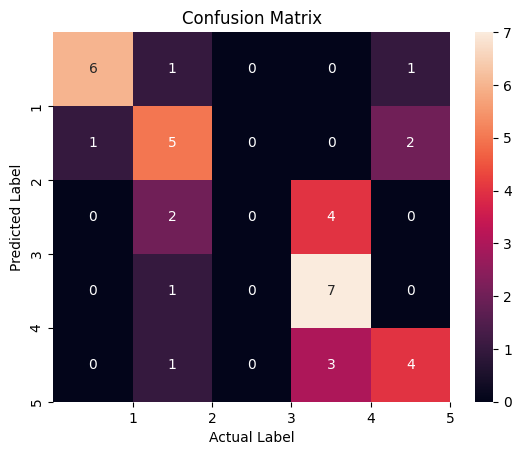

In [402]:
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix")
plt.xticks([1,2,3,4,5],labels=[1,2,3,4,5])
plt.yticks([1,2,3,4,5],labels=[1,2,3,4,5])
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()

### Classification Report

In [401]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.86      0.75      0.80         8
           2       0.50      0.62      0.56         8
           3       0.00      0.00      0.00         6
           4       0.50      0.88      0.64         8
           5       0.57      0.50      0.53         8

    accuracy                           0.58        38
   macro avg       0.49      0.55      0.51        38
weighted avg       0.51      0.58      0.53        38



### Saving our model

In [405]:
import pickle

In [406]:
with open('model.pkl','wb') as f:
    pickle.dump(clf,f)

#### We converting our problem from Multi Class Classification problem to Binary Class Classification Problem

We will map Rating 1 and 2 as "Bad" and Rating 3, 4 and 5 as "Good"

In [364]:
df['B_Rating'] = df['Rating'].map({1:"Bad",2:"Bad",3:"Good",4:"Good",5:"Good"})

In [365]:
df['B_Rating'].value_counts()

B_Rating
Bad     550
Good    155
Name: count, dtype: int64

### Balancing our Imbalanced Dataset

In [366]:
rt_b = df[df['B_Rating'] == "Bad"]
rt_g = df[df['B_Rating'] == "Good"]

In [368]:
balanced_df1 = pd.concat([rt_b.sample(155,random_state=10),rt_g],axis=0)

In [369]:
balanced_df1.drop('Rating',axis=1,inplace=True)

### Performing One Hot Encoding on 'B_Rating' column

In [370]:
balanced_df1['B_Rating'] = balanced_df1['B_Rating'].map({"Bad":0,"Good":1})

In [371]:
balanced_df1.head()

,Review,B_Rating
575,approx hr actual time checked sdpd sunday augu...,0
501,new manager store time started day show love n...,0
389,alexis starbucks rude every time go give impre...,0
541,starbucks customer service horrible worst expe...,0
677,visit starbucks drive thru regular basis alway...,0


In [372]:
balanced_df1['B_Rating'].value_counts()

B_Rating
0    155
1    155
Name: count, dtype: int64

### Converting Words into Vectors

#### Bag of Words

In [ ]:
bow = CountVectorizer(ngram_range=(1,1))
X = bow.fit_transform(balanced_df1['Review'])

#### TF-IDF

In [211]:
tfidf = TfidfVectorizer(ngram_range=(1,1))
X = tfidf.fit_transform(balanced_df1['Review'])

#### CBOW 

In [212]:
corpus = []

In [215]:
for i in range(balanced_df1.shape[0]):
    review = balanced_df1.iloc[i,0].split()
    for j in range(len(review)):
        corpus.append(review[j])

In [261]:
cbow = gensim.models.Word2Vec(corpus, min_count = 1, vector_size = 200, window = 5)

In [262]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [cbow.wv[word] for word in words if word in cbow.wv]
    if len(words_vecs) == 0:
        return np.zeros(200)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [263]:
X = np.array([vectorize(sentence) for sentence in balanced_df1['Review']])

### Skip gram

In [300]:
skipgram = gensim.models.Word2Vec(corpus, min_count = 1, vector_size = 200, window = 5, sg = 1)

In [301]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [skipgram.wv[word] for word in words if word in skipgram.wv]
    if len(words_vecs) == 0:
        return np.zeros(200)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [302]:
X = np.array([vectorize(sentence) for sentence in balanced_df1['Review']])

### Word2Vec Google News Pretrained model

In [313]:
import gensim.downloader as api

wv = api.load("word2vec-google-news-300")

In [373]:
def vectorize(sentence):
  words = sentence.split()
  words_vecs = []
  for word in words:
    try:
      words_vecs.append(wv[word])
    except KeyError:
      words_vecs.append(np.zeros(300))
  return np.array(words_vecs).mean(axis=0)

In [374]:
X = np.array([vectorize(sentence) for sentence in balanced_df1['Review']])

### Independent Variable

In [375]:
X.shape

(310, 300)

### Dependent Variable

In [376]:
y = balanced_df1['B_Rating'] 

In [377]:
y.value_counts()

B_Rating
0    155
1    155
Name: count, dtype: int64

### Splitting between training and testing set

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [379]:
y_test.value_counts()

B_Rating
1    31
0    31
Name: count, dtype: int64

### Feature Scaling

In [380]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training the model with Logistic Regression

In [381]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

### Accuracy Score

In [382]:
clf.score(X_test,y_test)

0.8387096774193549

### Confusion Matrix

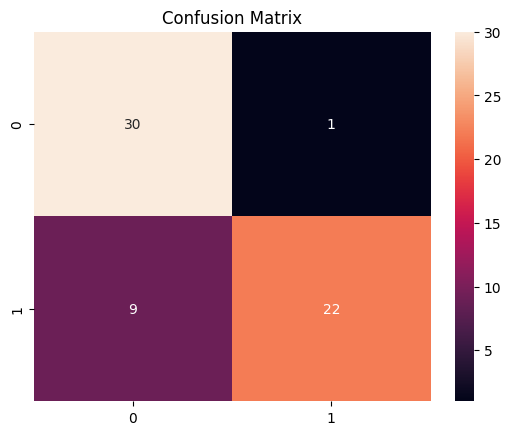

In [383]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [384]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        31
           1       0.96      0.71      0.81        31

    accuracy                           0.84        62
   macro avg       0.86      0.84      0.84        62
weighted avg       0.86      0.84      0.84        62

